In [10]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from sklearn.model_selection import train_test_split
from colorama import init, Fore, Style
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [2]:
def jsonl_to_dataframe(file_path):
    return pd.read_json(file_path, lines=True)

def merge_jsonl_to_dataframe(file_pattern):
    """Fonction pour fusionner plusieurs fichiers JSONL en un seul DataFrame pandas"""
    # Récupérer la liste des fichiers correspondant au modèle fourni
    files = glob(file_pattern)
    
    
    # Lire chaque fichier JSONL et stocker les DataFrames individuels dans une liste
    dfs = [jsonl_to_dataframe(file) for file in files]
    # Concaténer les DataFrames
    merged_df = pd.concat(dfs, ignore_index=True)
    
    return merged_df

# Modèle de chemin vers les fichiers JSONL à fusionner
file_pattern = "data/*.jsonl"

# Appel de la fonction pour fusionner les fichiers JSONL en un DataFrame
df = merge_jsonl_to_dataframe(file_pattern)

# Afficher le DataFrame fusionné


#  Setup the dataFrame for the predictive models

In [3]:
# Creating the answers_df
human_df = pd.DataFrame({'questions': df['question'], 'answers': df['human_answers'], 'is_human': 1 })
gpt_df = pd.DataFrame({'questions': df['question'], 'answers': df['chatgpt_answers'], 'is_human': 0})
answers_df = pd.concat([human_df, gpt_df], axis=0, ignore_index=True)

# Checking the len
answers_df = answers_df.explode('answers', ignore_index=True)
answers_df = answers_df.dropna(subset=['answers'], ignore_index=True)

answers_df

,questions,answers,is_human
0,Does Primolut N taken during pregnancy affect ...,"Hi, Thanks for the query. I understand you...",1
1,Bloating and pain on right lower abdomen. Shou...,"Hello,Thanks for the query to H.C.M. Forum.Pai...",1
2,Is chest pain related to intake of clindamycin...,"Hello, The use of Clindamycin can cause stomac...",1
3,Q. Noticed a yellowish sag in the gums of my 1...,Hello. Revert back with the photos to a dentis...,1
4,"Suggest remedy for low grade fever, hot and co...","Hi Dear,Welcome to Healthcaremagic Team.Unders...",1
...,...,...,...
170893,what are layers of the ionosphere,The ionosphere is a layer of the Earth's upper...,0
170894,what are layers of the ionosphere,The ionosphere is a layer of Earth's atmospher...,0
170895,what state is new orleans in,New Orleans is a city located in the state of ...,0
170896,what state is new orleans in,New Orleans is a city located in the state of ...,0


In [45]:
X = answers_df['answers']
y = answers_df['is_human']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [48]:
a = TfidfVectorizer()

Vec = a.fit(X)

# Logistic Regression

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

from gensim.models import KeyedVectors
from sklearn.linear_model import LogisticRegression
import gensim.downloader
from nltk.tokenize import word_tokenize, sent_tokenize


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

### Logistic Regression With TdIf

Accuracy:  0.9881217086015214


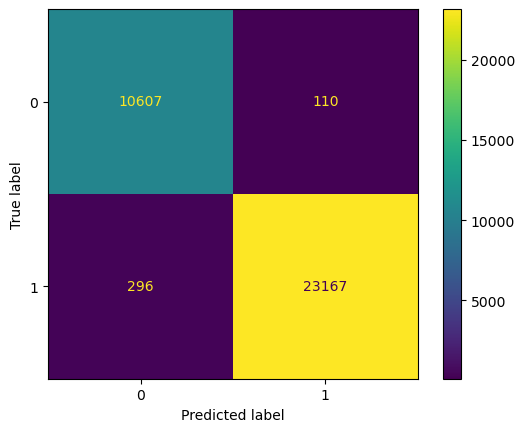

In [66]:

model = make_pipeline(TfidfVectorizer(max_features=10000,ngram_range=(1,2)), LogisticRegression(C=10, random_state=42, class_weight='balanced', penalty='l2', max_iter=100))
model.fit(X_train, y_train)

evaluate_model(model, X_test, y_test)

### Logistic Regression with Cross Validation

Accuracy:  0.9657109420713867


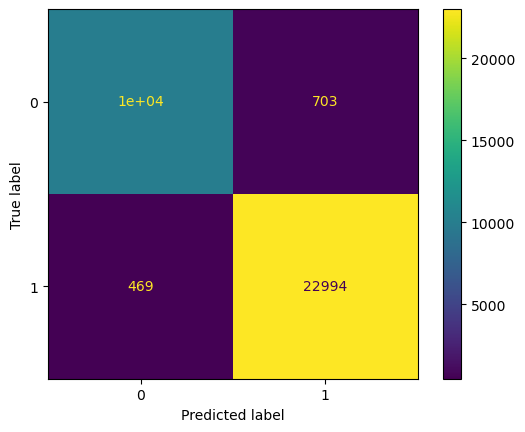

In [52]:
evaluate_model(model, X_test, y_test)

/opt/mamba/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/mamba/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/mamba/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/mamba/lib/python3.11/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, *

Meilleurs paramètres: {'logisticregression__C': 10.0, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'tfidfvectorizer__max_features': 10000, 'tfidfvectorizer__ngram_range': (1, 2)}
Meilleur score: 0.9864246156262038
Accuracy:  0.9877413692217671


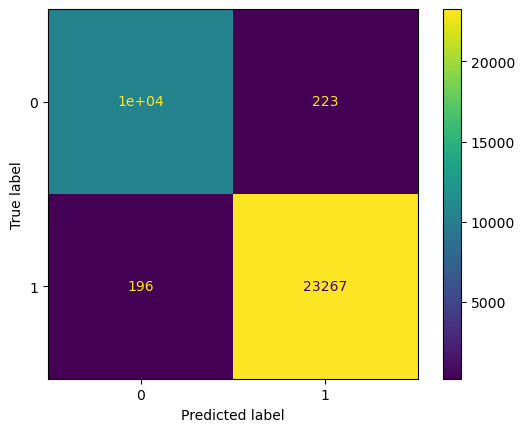

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Définir les paramètres pour TfidfVectorizer
tfidf_params = {
    'tfidfvectorizer__max_features': [1000, 5000, 10000],
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
}

# Définir les paramètres pour LogisticRegression
logreg_params = {
    'logisticregression__C': [0.1, 1.0, 10.0],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__max_iter': [100, 500, 1000],
}

# Créer la grille de paramètres
param_grid = {
    **tfidf_params,
    **logreg_params,
}

# Créer le pipeline
pipeline = Pipeline([
    ('tfidfvectorizer', TfidfVectorizer()),
    ('logisticregression', LogisticRegression(random_state=42)),
])

# Effectuer la recherche sur grille exhaustive
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score:", grid_search.best_score_)


# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
evaluate_model(best_model, X_test, y_test)


In [ ]:
# Ajouter d autre parametres a l IA (genre compter le nombre d orhtoraphae)

# Generer des donnes

# Analyse statisqieu

# BenchMark

# PRoposer une solution finale - cher possible + effica computation

# Etat d'ArithmeticError



# Calculer la puissance !!

# Slides utilsie une appli 


# Utiliser des GPU et voir pk 

# Si marchine learning meilleur alors prendre  Deep Learning

# Interpret fiction 

# Front + Back


# Faire un ptn de QR CODE ou les mec peuvent ecrire le test